# Magritte quick plots

#### An example notebook for making plots of the most recent Magritte output
---

## Loading Magritte output

Import the `MagritteIO` module for handling the `Magritte` input and output.

In [25]:
import MagritteIO as mio

Get the current (i.e. most recent) output directory and the number of outputs it contains.

In [26]:
outputDirectory = mio.outputDirectory()           # current output directory
nOutputs        = mio.nOutputs(outputDirectory)   # number of outputs

Read the `Magritte` output from the `outputDirectory` into the cell structure. Each output has its own cell structure. `cells` is the array of cell structures for all outputs.

In [27]:
tags  = range(nOutputs)
cells = [mio.cell(outputDirectory, str(tag)) for tag in tags]

## Plot output

Import `matplotlib.pyplot` for plotting.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Gas temperature

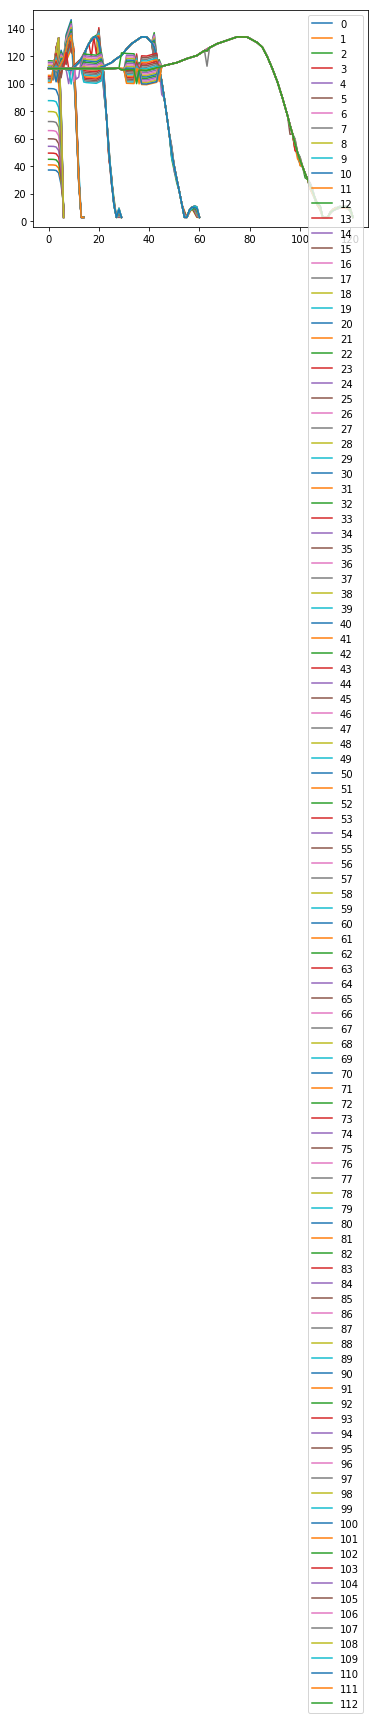

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureGas, label=i)
ax1.legend()

### Dust temperature

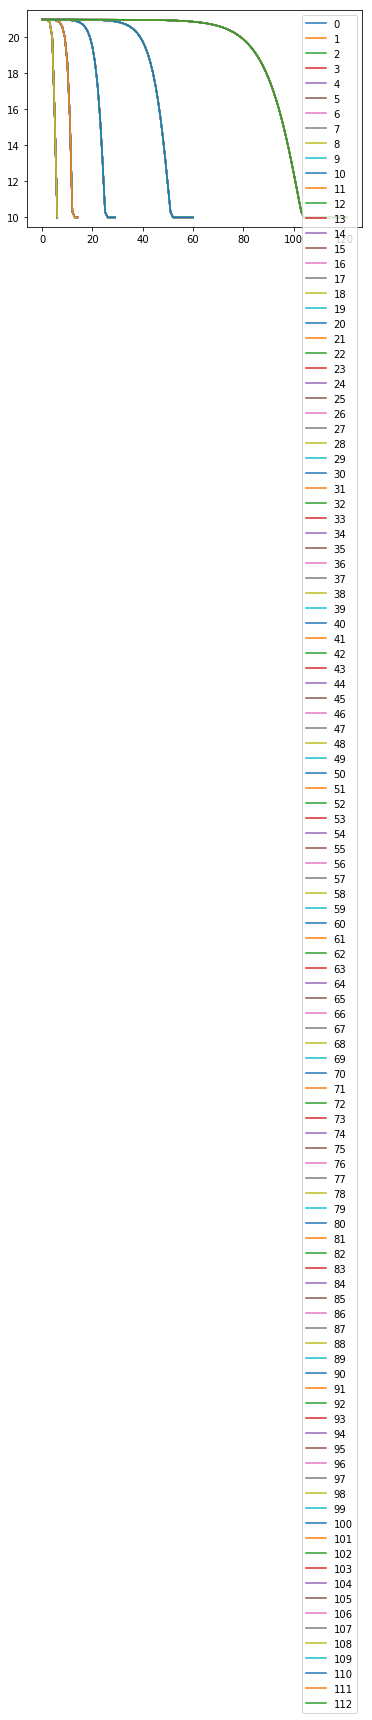

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureDust, label=i)
ax1.legend()

### Abundances

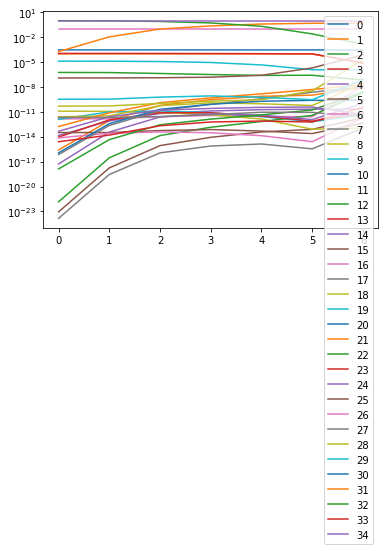

In [31]:
tag = 0

nspec = np.shape(cells[tag].abundances)[1]   # Number of species

fig = plt.figure()
ax1 = fig.add_subplot(111)

for s in range(nspec):
    ax1.plot(cells[tag].abundances[:,s], label=s)
    ax1.set_yscale('log')
ax1.legend()

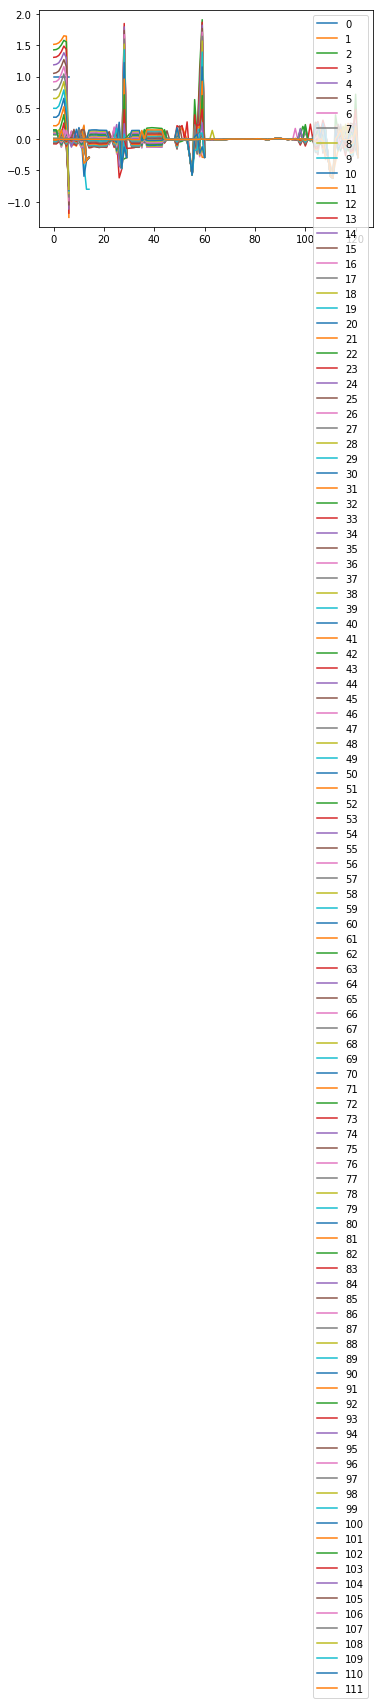

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs-1):
    ax1.plot(cells[i].thermalRatio, label=i)
ax1.legend()

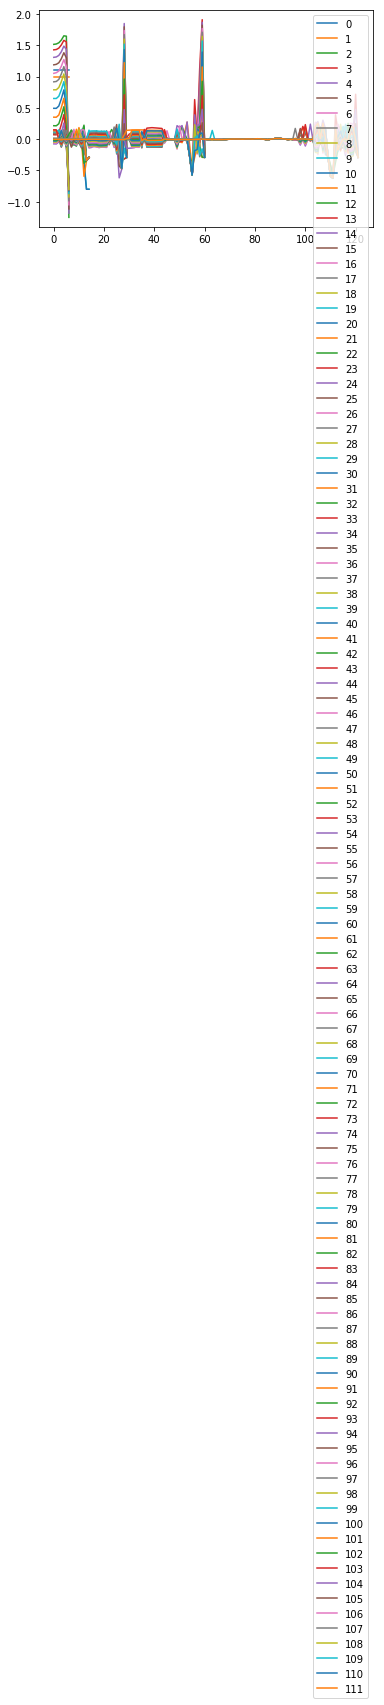

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs-1):
    ax1.plot(cells[i].thermalRatioPrev, label=i)
ax1.legend()

In [34]:
print cells[6].temperatureGas

[ 65.80075   65.78787   65.70668   65.19758   62.1076    46.75003
   5.912243]


In [35]:
def newTemp(cell):
    return (cell.temperatureGas * cell.thermalRatioPrev - cell.temperatureGasPrev * cell.thermalRatio)

def newDen(cell):
    return (cell.thermalRatioPrev - cell.thermalRatio)

In [36]:
print newTemp(cells[5])

[ 31.98513224  32.07744703  32.54672653  33.3266582   33.4150945
  24.58416698   4.34540262]


In [12]:
print newDen(cells[5])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [13]:
print cells[5].thermalRatioPrev

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


In [14]:
print cells[5].thermalRatio

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
